# Retrieving the csv files for each ROI and analysing them.


In [23]:
### load the csv data from the folder, load the smooth trace and plot the traces, then compute correlation matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
!pip install whittaker_eilers



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 11.0 MB/s eta 0:00:00


## Data loading

Load the provided CSV file into a Dictionary


In [78]:
import csv

def csv_to_dict(csv_file_path):
  """Loads a CSV file into a dictionary.

  Args:
    csv_file_path: The path to the CSV file.

  Returns:
    A dictionary where keys are ROI names (from the first row) and
    values are lists of corresponding data (columns).
    Returns None if the file is not found or an error occurs.
  """
  try:
    with open(csv_file_path, 'r') as file:
      reader = csv.reader(file)
      header = next(reader)  # Get the header row (ROI names)
      data_dict = {roi: [] for roi in header}

      for row in reader:
        for i, value in enumerate(row):
            try:
                data_dict[header[i]].append(float(value)) # Convert values to float if possible
            except (ValueError, IndexError):
                print(f"Skipping invalid value or index error at row: {row}, column: {i}")
                # Handle the error as needed (e.g., skip the value, assign a default)

      return data_dict
  except FileNotFoundError:
      print(f"Error: File not found at {csv_file_path}")
      return None
  except Exception as e:
      print(f"An unexpected error occurred: {e}")
      return None



from google.colab import files

uploaded = files.upload()

# Get the filename from the uploaded dictionary
filename = list(uploaded.keys())[0]

dict_avg_pixel_df_f = csv_to_dict(filename) # Pass the filename to csv_to_dict


Saving Average_DF_F0_Values_1pixel_perROIsback wave + Hunch-stabilised.csv to Average_DF_F0_Values_1pixel_perROIsback wave + Hunch-stabilised (4).csv


# Plot the traces in a ridge-like plot (you can modify the desired smoothing)

['T3l', 'T3r', 'A1l', 'A1r', 'A2l', 'A2r', 'A3l', 'A3r', 'A4l', 'A4r', 'A5l', 'A5r', 'A6l', 'A6r', 'A7l', 'A7r', 'A8l', 'A8r', 'A9l', 'A9r']


<ipython-input-79-4211c43b554d>:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')  # You might want to adjust the legend to include the zero line


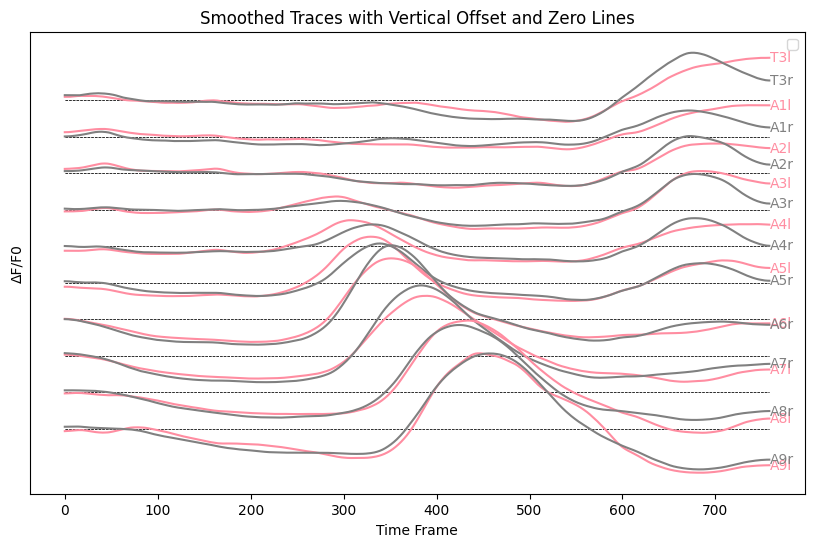

In [79]:
###########################                     ###########################
########################### IMPORTANT PLOTTING ###########################
###   plots smoothed average pixel per roi left and right overlaid     ###########################

from whittaker_eilers import WhittakerSmoother

# Initialize the Whittaker smoother
whittaker_smoother = WhittakerSmoother(
    lmbda=200, order=1, data_length=(len(dict_avg_pixel_df_f['A6r']))
)

num_rois = len(dict_avg_pixel_df_f.keys())
offset_height = 0.35 # Define vertical spacing between traces

fig, ax = plt.subplots(figsize=(10, 6))

# Custom sorting function to prioritize 'T' ROIs
def sort_roi_names(roi_name):
    if roi_name.startswith('T'):
        return (0, roi_name)  # 'T' ROIs come first
    else:
        return (1, roi_name)  # Other ROIs come after

sorted_rois_name_xy = sorted(dict_avg_pixel_df_f.keys(), key=sort_roi_names)

print(sorted_rois_name_xy)

# Loop through ROIs and plot with offsets
for i, roi_name in enumerate(sorted_rois_name_xy):



    if i % 2 == 0:  # Even index (left side ROIs)
        offset = -offset_height * (i )  # Divide by 2 for proper spacing
        color = '#ff8da1'  # Set color to pink for left side
    else:  # Odd index (right side ROIs)
        offset = -offset_height * ((i - 1) )  # Divide by 2 for proper spacing
        color = 'grey'  # Set color to gray for right side

    avg_pixel_df_f = dict_avg_pixel_df_f[roi_name] # Average dF/F for this ROI

    smoothed_df_f = np.array(whittaker_smoother.smooth(avg_pixel_df_f))

    # Plot the smoothed trace with offset
    ax.plot(smoothed_df_f + offset, color=color)

    # Add text label next to the trace
    ax.text(len(smoothed_df_f), smoothed_df_f[-1] + offset, roi_name, color=color,
            ha='left', va='center')

    # Add a zero line for the current offset
    ax.plot(np.zeros_like(smoothed_df_f) + offset, color='black', linestyle='--', linewidth=0.5, alpha=0.8, zorder=1)  # Added alpha and zorder for visibility

ax.set_yticks([])
# Set labels and legend
ax.set_xlabel('Time Frame')
ax.set_ylabel('ΔF/F0')
ax.legend(loc='upper right')  # You might want to adjust the legend to include the zero line
plt.title('Smoothed Traces with Vertical Offset and Zero Lines')
plt.show()

# Correlation Matrix

Please enter stimulus start frame: 600
Please enter stimulus duration: 200
['T3l', 'T3r', 'A1l', 'A1r', 'A2l', 'A2r', 'A3l', 'A3r', 'A4l', 'A4r', 'A5l', 'A5r', 'A6l', 'A6r', 'A7l', 'A7r', 'A8l', 'A8r', 'A9l', 'A9r']


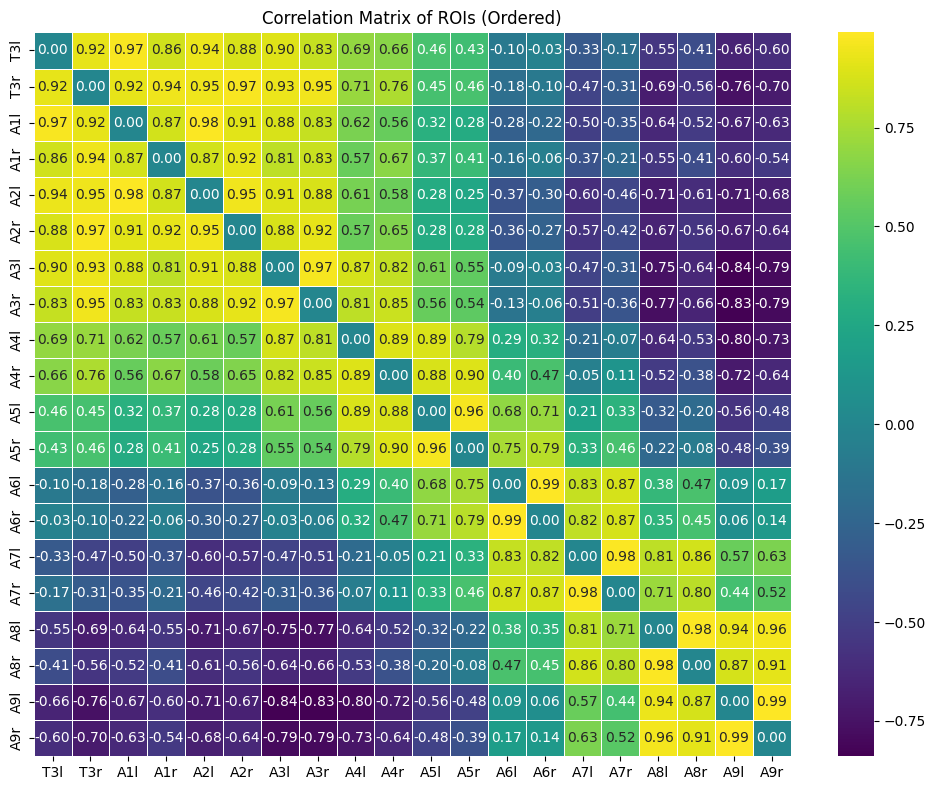

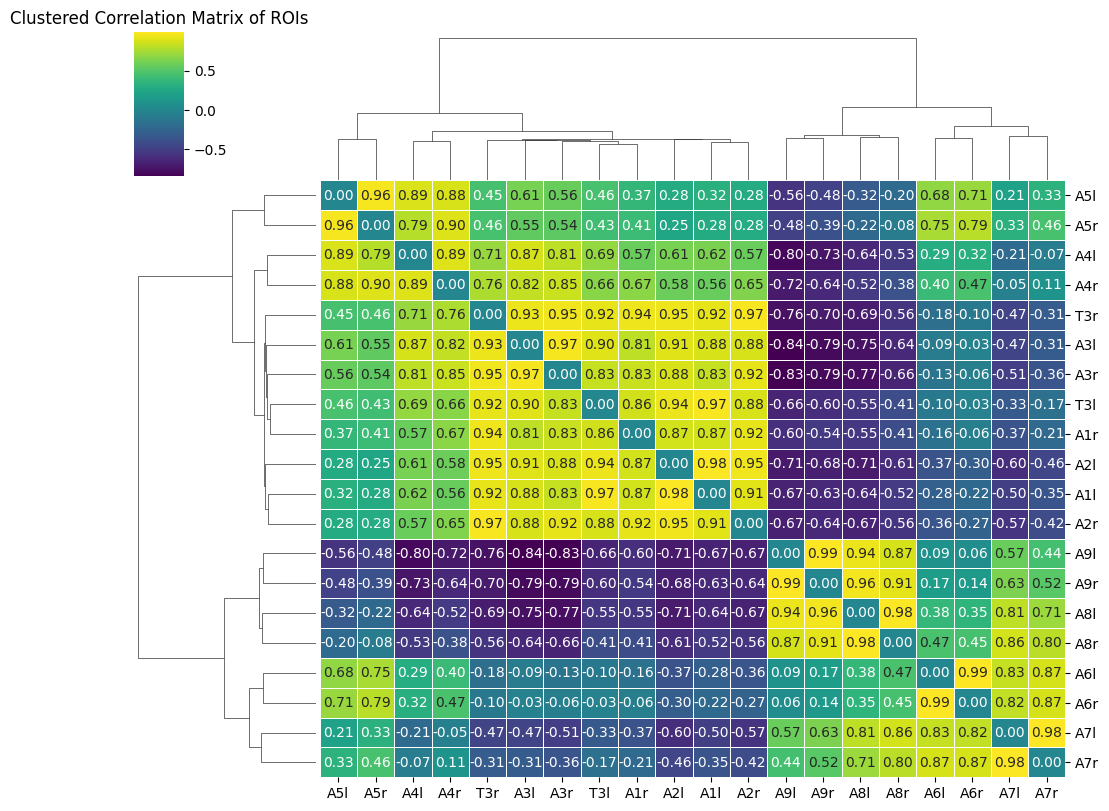

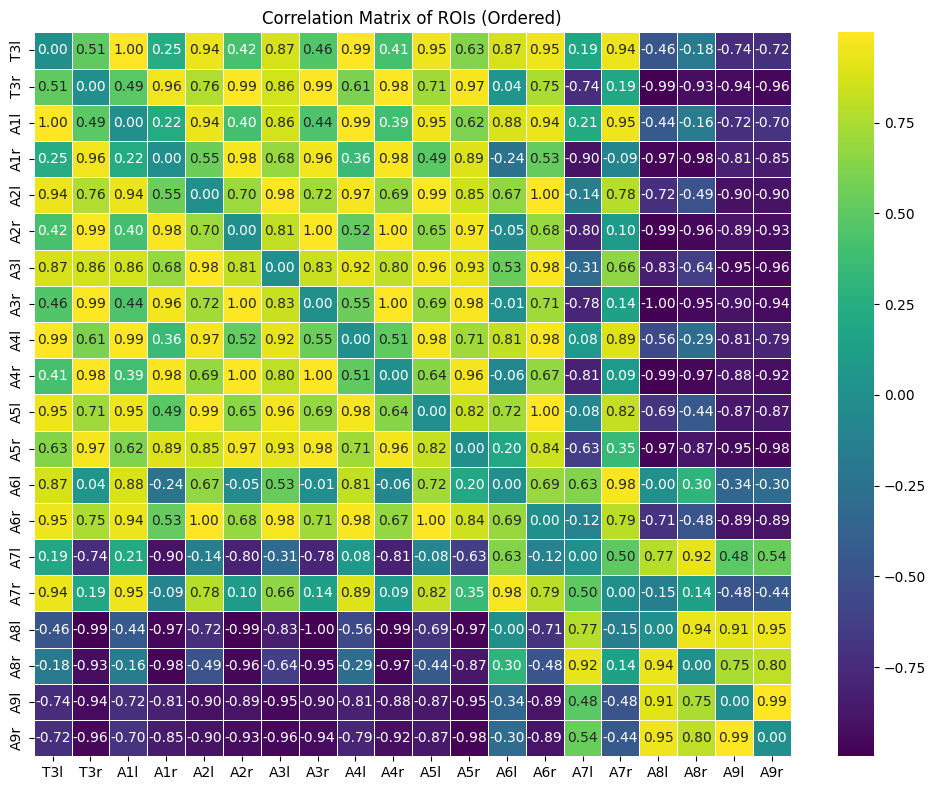

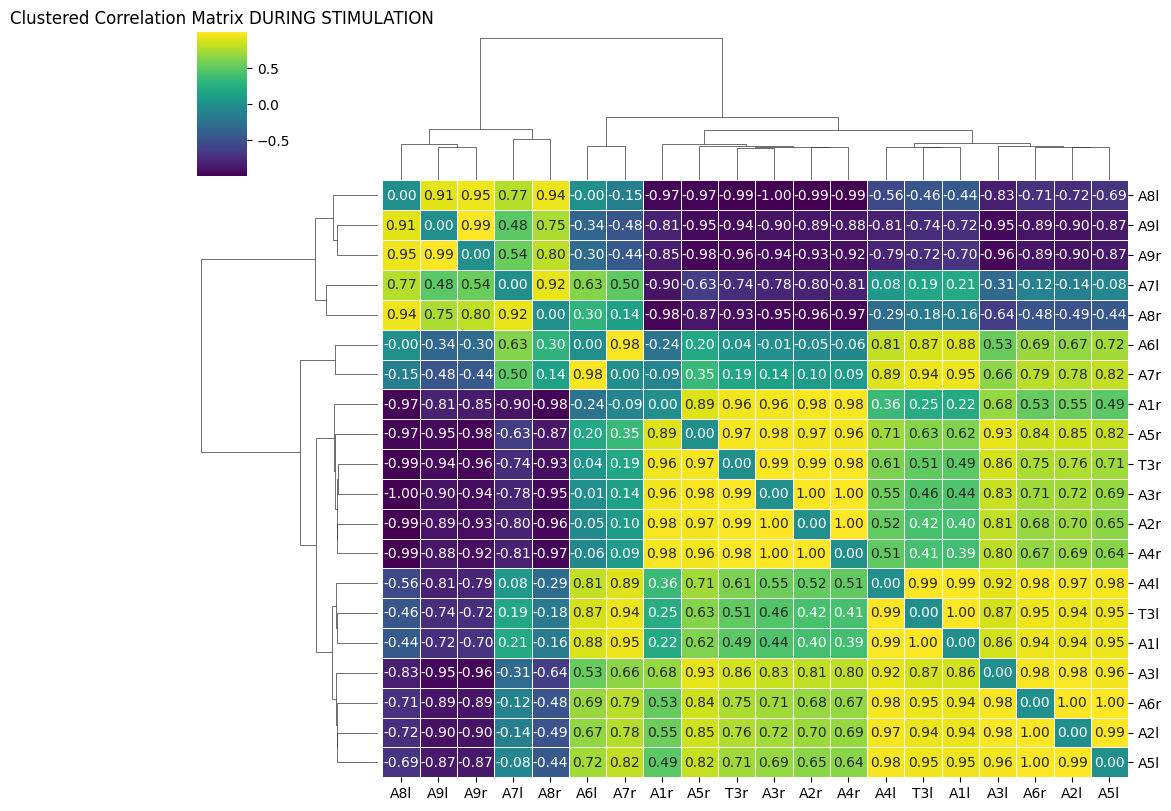

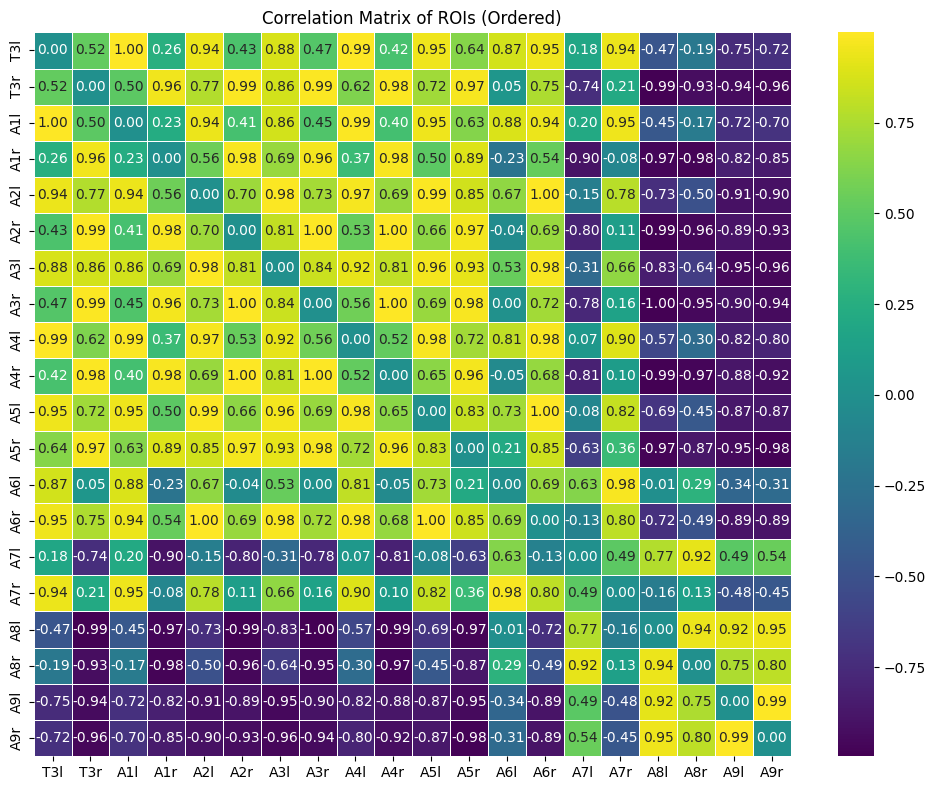

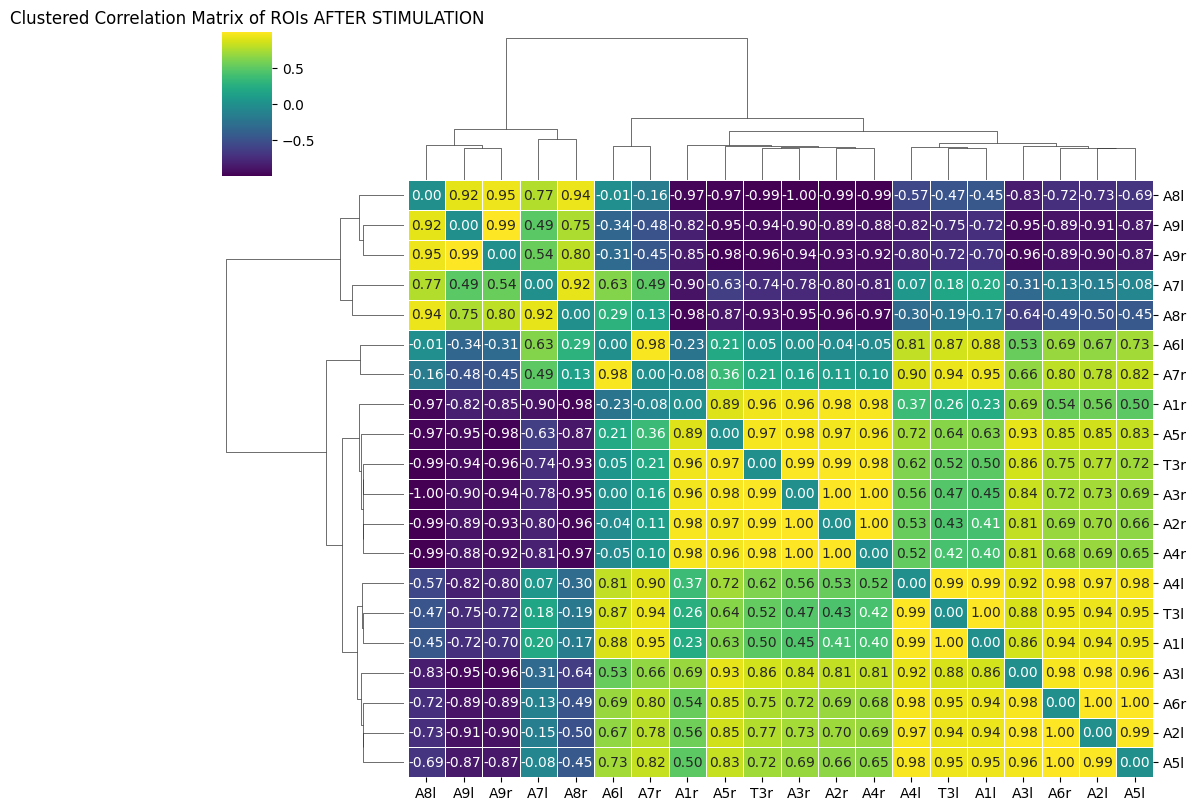

In [80]:
###########################             ###########################
########################### CORRELATION MATRIX ###########################
###########################             ###########################

import pandas as pd
from scipy import stats


stimulus_start = input("Please enter stimulus start frame: ")
stimulus_duration = input("Please enter stimulus duration: ")
stimulus_frame = int(stimulus_start)
stimulus_duration = int(stimulus_duration)

# Custom sorting function to prioritize 'T' ROIs
def sort_roi_names(roi_name):
    if roi_name.startswith('T'):
        return (0, roi_name)  # 'T' ROIs come first
    else:
        return (1, roi_name)  # Other ROIs come after

sorted_roi_names = sorted(dict_avg_pixel_df_f.keys(), key=sort_roi_names)

print(sorted_roi_names)


########## calculate smooth avf trace

dict_smooth_avg_pixel_df_f = dict()
# Loop through ROIs
for i,roi_name in enumerate(dict_avg_pixel_df_f):

    avg_pixel_df_f = dict_avg_pixel_df_f[roi_name]

    smoothed_df_f = np.array(whittaker_smoother.smooth(avg_pixel_df_f))

    dict_smooth_avg_pixel_df_f[roi_name] = smoothed_df_f

# Create an empty correlation matrix
num_rois = len(sorted_roi_names)
correlation_matrix = np.zeros((num_rois, num_rois))

# Calculate correlations between all pairs of ROIs (using sorted roi_names)

for i in range(num_rois):
    for j in range(i + 1, num_rois):  # Avoid redundant calculations
        roi1_data = dict_smooth_avg_pixel_df_f[sorted_roi_names[i]]
        roi2_data = dict_smooth_avg_pixel_df_f[sorted_roi_names[j]]
        correlation, _ = stats.pearsonr(roi1_data, roi2_data)
        correlation_matrix[i, j] = correlation_matrix[j, i] = correlation

# Create a Pandas DataFrame for the correlation matrix (using sorted roi_names)
df_corr = pd.DataFrame(correlation_matrix, index=sorted_roi_names, columns=sorted_roi_names)

# Plot the correlation matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(df_corr, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of ROIs (Ordered)')
plt.tight_layout()
plt.show()


# Clustered ordering based on correlation
linkage = sns.clustermap(df_corr, method="average", metric="euclidean", row_cluster=True, col_cluster=True, figsize=(10, 8), cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Clustered Correlation Matrix of ROIs')
plt.show()




# Calculate correlations between all pairs of ROIs (using sorted roi_names) DURINF STIMULUS ONLY

for i in range(num_rois):
    for j in range(i + 1, num_rois):  # Avoid redundant calculations
        roi1_data = dict_smooth_avg_pixel_df_f[sorted_roi_names[i]][stimulus_frame:stimulus_frame+stimulus_duration]
        roi2_data = dict_smooth_avg_pixel_df_f[sorted_roi_names[j]][stimulus_frame:stimulus_frame+stimulus_duration]
        correlation, _ = stats.pearsonr(roi1_data, roi2_data)
        correlation_matrix[i, j] = correlation_matrix[j, i] = correlation

# Create a Pandas DataFrame for the correlation matrix (using sorted roi_names)
df_corr = pd.DataFrame(correlation_matrix, index=sorted_roi_names, columns=sorted_roi_names)

# Plot the correlation matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(df_corr, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of ROIs (Ordered)')
plt.tight_layout()
plt.show()


# Clustered ordering based on correlation
linkage = sns.clustermap(df_corr, method="average", metric="euclidean", row_cluster=True, col_cluster=True, figsize=(10, 8), cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Clustered Correlation Matrix DURING STIMULATION')
plt.show()


# Calculate correlations between all pairs of ROIs (using sorted roi_names) AFTER STIMULUS

for i in range(num_rois):
    for j in range(i + 1, num_rois):  # Avoid redundant calculations
        roi1_data = dict_smooth_avg_pixel_df_f[sorted_roi_names[i]][stimulus_frame:-1]
        roi2_data = dict_smooth_avg_pixel_df_f[sorted_roi_names[j]][stimulus_frame:-1]
        correlation, _ = stats.pearsonr(roi1_data, roi2_data)
        correlation_matrix[i, j] = correlation_matrix[j, i] = correlation

# Create a Pandas DataFrame for the correlation matrix (using sorted roi_names)
df_corr = pd.DataFrame(correlation_matrix, index=sorted_roi_names, columns=sorted_roi_names)

# Plot the correlation matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(df_corr, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of ROIs (Ordered)')
plt.tight_layout()
plt.show()


# Clustered ordering based on correlation
linkage = sns.clustermap(df_corr, method="average", metric="euclidean", row_cluster=True, col_cluster=True, figsize=(10, 8), cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Clustered Correlation Matrix of ROIs AFTER STIMULATION')
plt.show()

['T3l', 'T3r', 'A1l', 'A1r', 'A2l', 'A2r', 'A3l', 'A3r', 'A4l', 'A4r', 'A5l', 'A5r', 'A6l', 'A6r', 'A7l', 'A7r', 'A8l', 'A8r', 'A9l', 'A9r']


<ipython-input-81-3bd35c5bd936>:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')  # You might want to adjust the legend to include the zero line


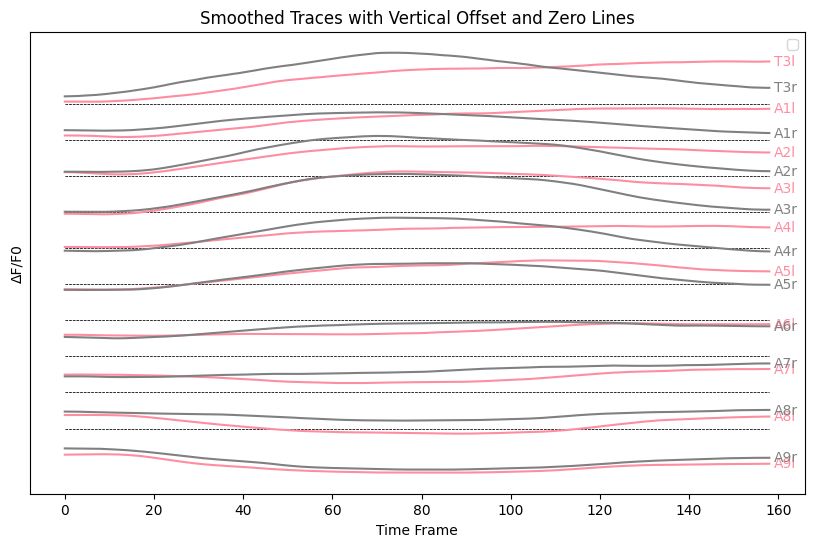

In [81]:
###########################                     ###########################
########################### IMPORTANT PLOTTING ###########################
###   plots smoothed average pixel per roi left and right overlaid     ###########################

from whittaker_eilers import WhittakerSmoother

# Initialize the Whittaker smoother
whittaker_smoother = WhittakerSmoother(
    lmbda=50, order=1, data_length=(len(dict_avg_pixel_df_f['A6r'][600:800]))
)

num_rois = len(dict_avg_pixel_df_f.keys())
offset_height = 0.35 # Define vertical spacing between traces

fig, ax = plt.subplots(figsize=(10, 6))

# Custom sorting function to prioritize 'T' ROIs
def sort_roi_names(roi_name):
    if roi_name.startswith('T'):
        return (0, roi_name)  # 'T' ROIs come first
    else:
        return (1, roi_name)  # Other ROIs come after

sorted_rois_name_xy = sorted(dict_avg_pixel_df_f.keys(), key=sort_roi_names)

print(sorted_rois_name_xy)

# Loop through ROIs and plot with offsets
for i, roi_name in enumerate(sorted_rois_name_xy):



    if i % 2 == 0:  # Even index (left side ROIs)
        offset = -offset_height * (i )  # Divide by 2 for proper spacing
        color = '#ff8da1'  # Set color to pink for left side
    else:  # Odd index (right side ROIs)
        offset = -offset_height * ((i - 1) )  # Divide by 2 for proper spacing
        color = 'grey'  # Set color to gray for right side

    avg_pixel_df_f = dict_avg_pixel_df_f[roi_name][600:800] # Average dF/F for this ROI

    smoothed_df_f = np.array(whittaker_smoother.smooth(avg_pixel_df_f))

    # Plot the smoothed trace with offset
    ax.plot(smoothed_df_f + offset, color=color)

    # Add text label next to the trace
    ax.text(len(smoothed_df_f), smoothed_df_f[-1] + offset, roi_name, color=color,
            ha='left', va='center')

    # Add a zero line for the current offset
    ax.plot(np.zeros_like(smoothed_df_f) + offset, color='black', linestyle='--', linewidth=0.5, alpha=0.8, zorder=1)  # Added alpha and zorder for visibility

ax.set_yticks([])
# Set labels and legend
ax.set_xlabel('Time Frame')
ax.set_ylabel('ΔF/F0')
ax.legend(loc='upper right')  # You might want to adjust the legend to include the zero line
plt.title('Smoothed Traces with Vertical Offset and Zero Lines')
plt.show()